In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('covid_comorbidities_USsummary.csv') # Read file into pandas dataframe
df

,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,300,310
1,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1408,1433
2,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,3799,3881
3,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,11337,11627
4,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,29064,29754
...,...,...,...,...,...,...
215,COVID-19,COVID-19,U071,65-74,105800,105800
216,COVID-19,COVID-19,U071,75-84,136333,136333
217,COVID-19,COVID-19,U071,85+,153911,153911
218,COVID-19,COVID-19,U071,Not stated,8,8


In [3]:
df_without_covid = df.drop(df[df['Condition']=='COVID-19'].index) # Drop all rows with COVID-19 as the condition (these rows have no comorbidity)
df_without_covid

,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,300,310
1,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1408,1433
2,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,3799,3881
3,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,11337,11627
4,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,29064,29754
...,...,...,...,...,...,...
205,"Intentional and unintentional injury, poisonin...","Intentional and unintentional injury, poisonin...","S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y...",65-74,1929,3538
206,"Intentional and unintentional injury, poisonin...","Intentional and unintentional injury, poisonin...","S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y...",75-84,2450,4678
207,"Intentional and unintentional injury, poisonin...","Intentional and unintentional injury, poisonin...","S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y...",85+,3009,6105
208,"Intentional and unintentional injury, poisonin...","Intentional and unintentional injury, poisonin...","S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y...",Not stated,0,0


In [4]:
# Create dataframe that only holds rows with ages below 35
younger_than_35 = df_without_covid[(df_without_covid['Age Group'] == '0-24') | (df_without_covid['Age Group'] == '25-34')]
younger_than_35

,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,300,310
1,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1408,1433
10,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,0-24,44,46
11,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,25-34,135,135
20,Respiratory diseases,Adult respiratory distress syndrome,J80,0-24,132,132
21,Respiratory diseases,Adult respiratory distress syndrome,J80,25-34,511,511
30,Respiratory diseases,Respiratory failure,J96,0-24,246,255
31,Respiratory diseases,Respiratory failure,J96,25-34,998,1013
40,Respiratory diseases,Respiratory arrest,R09.2,0-24,15,15
41,Respiratory diseases,Respiratory arrest,R09.2,25-34,57,57


In [5]:
group_test = younger_than_35.groupby(['Condition']).sum().sort_values(by='COVID-19 Deaths', ascending=False) # Possibly add this to py file
group_test

,COVID-19 Deaths,Number of Mentions
Condition,,
Influenza and pneumonia,1708,1743
Respiratory failure,1244,1268
Obesity,930,933
Adult respiratory distress syndrome,643,643
Cardiac arrest,559,560
Diabetes,518,522
Sepsis,431,432
Renal failure,340,352
Other diseases of the circulatory system,340,382


In [35]:
ordered_by_deaths = younger_than_35.groupby(['Condition']).sum().sort_values(by='COVID-19 Deaths', ascending=False).reset_index() # Possibly add this to py file
#ordered_by_deaths = younger_than_35.sort_values(by='COVID-19 Deaths', ascending=False) # Create a new dataframe ordered by number of deaths
max_deaths = ordered_by_deaths['COVID-19 Deaths'][0] # Select the maximum number of deaths from the dataframe
max_deaths_condition = ordered_by_deaths['Condition'][0] # Select the condition with the maximum number of deaths from the dataframe
print(f'The comorbidity with the highest amount of deaths below age 35 was "{max_deaths_condition}" with {max_deaths} deaths. This includes deaths from people in age groups 0-24 and 24-35.') # Print results


The comorbidity with the highest amount of deaths below age 35 was "Influenza and pneumonia" with 1708 deaths. This includes deaths from people in age groups 0-24 and 24-35.


In [29]:
test_df = ordered_by_deaths.copy().reset_index()
test_df

,Condition,COVID-19 Deaths,Number of Mentions
0,Influenza and pneumonia,1708,1743
1,Respiratory failure,1244,1268
2,Obesity,930,933
3,Adult respiratory distress syndrome,643,643
4,Cardiac arrest,559,560
5,Diabetes,518,522
6,Sepsis,431,432
7,Renal failure,340,352
8,Other diseases of the circulatory system,340,382
9,Hypertensive diseases,304,308


In [135]:
deaths_by_age_group = df_without_covid.groupby(['Age Group']).sum() # Create dataframe with number of deaths by age group
deaths_by_age_group = deaths_by_age_group[deaths_by_age_group.index != 'All Ages']
deaths_by_age_group = deaths_by_age_group[deaths_by_age_group.index != 'Not stated']
deaths_by_age_group

,COVID-19 Deaths,Number of Mentions
Age Group,,
0-24,1602,1755
25-34,6550,6904
35-44,18171,18831
45-54,53375,54877
55-64,140164,144142
65-74,260858,268419
75-84,328245,337591
85+,339632,348558


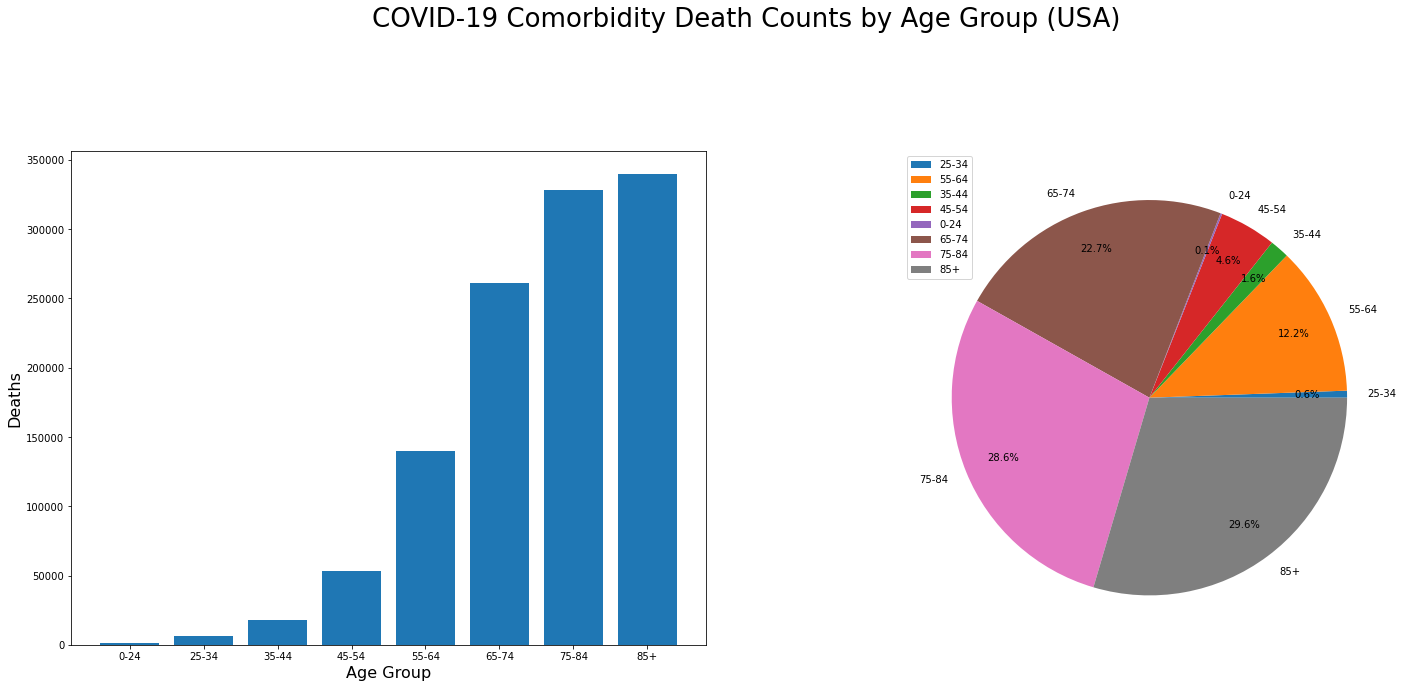

In [169]:
names = list(deaths_by_age_group.index)
values = list(deaths_by_age_group['COVID-19 Deaths'])
values_pie = [values[1],values[4],values[2],values[3],values[0],values[5],values[6],values[7]]
names_pie = [names[1],names[4],names[2],names[3],names[0],names[5],names[6],names[7]]

f = plt.figure(figsize = (25,20))
f.suptitle ('COVID-19 Comorbidity Death Counts by Age Group (USA)', fontsize=26)
ax = f.add_subplot(221)
ax.bar(names, values)
ax.set_xlabel('Age Group', fontsize=16)
ax.set_ylabel('Deaths', fontsize=16)

ax2 = f.add_subplot(222)
ax2.pie(values_pie, labels=names_pie, autopct='%.1f%%', pctdistance=0.8, labeldistance=1.1)
ax2.legend(loc='upper left', labels=names_pie)
